In [1]:
import numpy as np
from src.denselayer import DenseLayer
from src.model import Model
from src.optimizers import gradient_descent
from src.utils import one_hot_enc
from src.metrics import accuracy_categ_ce

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris['data']
y = one_hot_enc(iris['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(135, 4) (135, 3)
(15, 4) (15, 3)


In [3]:
layers = [
    DenseLayer(nodes_prev=4,  nodes_curr=10, activation="relu"),
    DenseLayer(nodes_prev=10, nodes_curr=10, activation="relu"),
    DenseLayer(nodes_prev=10, nodes_curr=3, activation="softmax")
]

model = Model(
    layers=layers, 
    optimizer=gradient_descent
)

In [4]:
history = model.fit(X_train, y_train, epoch=10, lr=0.01, bs=1)

Iteration: 1	 cost: 1.08819	accuracy: 34.81%
Iteration: 10	 cost: 0.17308	accuracy: 95.56%


In [5]:
accuracy_categ_ce(y_test, model.predict(X_test))

0.9333333333333333

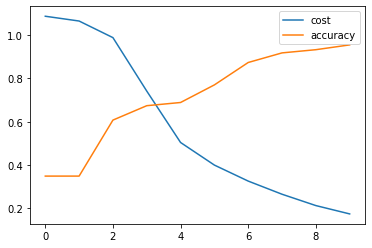

In [9]:
import matplotlib.pyplot as plt 
plt.plot(history)
plt.legend(['cost','accuracy'])
plt.show()